## The Data Story inside Steinbeck's Cannery Row

A *My Data Story* learning experience showing the sardine collapse in Monterrey California in the 20th Century through the novel Cannery Row by John Steinbeck.

### Sardine Harvest Data from NOAA

Starting in the 1940s, the Sardine fishery in the southern pacific went through a dramatic transformation  Use the dataset from the NOAA website to learn what happened. Record your process below.

#### Prep Code

In [88]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

os.chdir("C:/Users/drewc/Documents/stories")

noaa = pd.read_csv("data/fish_data_noaa.csv")
noaa.info()

temp = pd.read_csv("data/fish_data_newtemps.csv")
temp.info()

short = pd.read_csv("data/fish_data_shorttons.csv")
short.info()

old = pd.read_csv("data/fish_data_oldtemp.csv")
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 5 columns):
Year       109915 non-null int64
State      109915 non-null object
Species    109915 non-null object
Pounds     109908 non-null float64
Dollars    109894 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23332 entries, 0 to 23331
Data columns (total 5 columns):
Year      23332 non-null int64
Month     23332 non-null int64
Day       23332 non-null int64
Surf      23332 non-null float64
Bottom    23332 non-null float64
dtypes: float64(2), int64(3)
memory usage: 911.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
Year     42 non-null int64
Short    42 non-null int64
dtypes: int64(2)
memory usage: 752.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8539 entries, 0 to 8538
Data columns (total 4 columns):
Year           8539 non-null int6

#### Group NOAA data By Year, State, and Species. Drop Columns.

In [4]:
group = noaa.groupby(["Year", "State", "Species"], as_index = False).sum()
ready = group.drop(["Dollars"], axis=1)

#### Filter Dataset for Sardines in California

In [5]:
sard = ready[ready.Species == "SARDINE, PACIFIC"]
ca = sard[sard.State == "California"]

#### Create Plot with Labels, Title and Legend

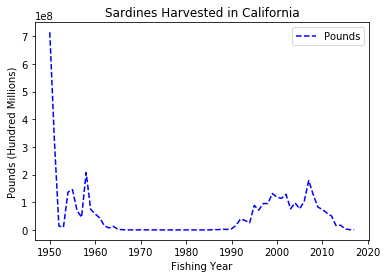

In [6]:
x = ca["Year"]
y = ca["Pounds"]
plt.plot(x, y, 'b--')
plt.ylabel("Pounds (Hundred Millions)")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Create filtered plot for after 1985 

Text(0.5, 1.0, 'Sardines Harvested in California')

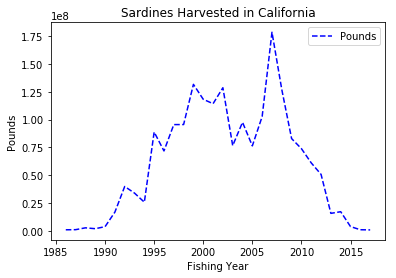

In [7]:
ca85 = ca[ca.Year > 1985]
x85 = ca85["Year"]
y85 = ca85["Pounds"]
plt.plot(x85, y85, 'b--')
plt.ylabel("Pounds")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")

### Water Temperature Data from UC Santa Barbara

Before the collapse and after the returned, the population fluctuated by year. Compare the water temperature dataset to assess any relationship. 

#### Group Temperature Data by Day, Month, and Year average

In [10]:
group = temp.groupby(["Year", "Month", "Day"]).mean()
groups = group.groupby("Year")["Surf"].mean() 
groupb = group.groupby("Year")["Bottom"].mean() 

#### Convert Series to Frame, Reset Index, and Combine back together

In [11]:
dfs = groups.to_frame()
dfb = groupb.to_frame()

indexs = dfs.reset_index(level=["Year"])
indexb = dfb.reset_index(level=["Year"])

indexb["Surf"] = indexs["Surf"]
tm = indexb

#### Create Plot with Labels, Title and Legend

Text(0.5, 1.0, 'Bottom Temperature at La Jolla Pier')

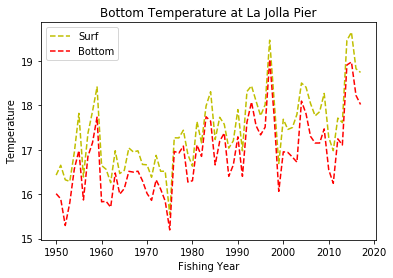

In [15]:
xt = tm["Year"]
ys = tm["Surf"]
plt.plot(xt, ys, 'y--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Surf Temperature at La Jolla Pier")

yb = tm["Bottom"]
plt.plot(xt, yb, 'r--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Bottom Temperature at La Jolla Pier")

#### Plot All Data Together

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

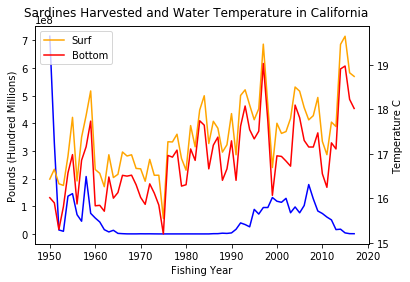

In [13]:
fig, ax1 = plt.subplots()

x = ca["Year"]
y = ca["Pounds"]
ax1.plot(x, y, color = "blue")
ax1.set_ylabel("Pounds (Hundred Millions)")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

xt = tm["Year"]
ys = tm["Surf"]
ax2.plot(xt, ys, "orange")
ax2.set_ylabel("Temperature C")

yb = tm["Bottom"]
plt.plot(xt, yb, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Plot All Data Together between 1952 and 1958

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

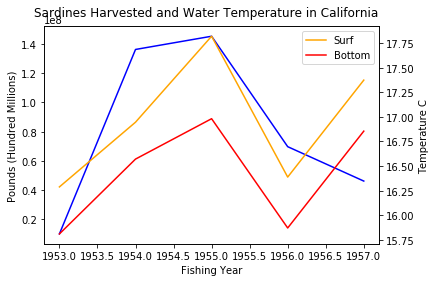

In [90]:
fig, ax1 = plt.subplots()

ca2 = ca[ca.Year > 1952]
ca28 = ca2[ca2.Year < 1958]

tm2 = tm[tm.Year > 1952]
tm28 = tm2[tm2.Year < 1958]

x28 = ca28["Year"]
y28 = ca28["Pounds"]
ax1.plot(x28, y28, color = "blue")
ax1.set_ylabel("Pounds (Hundred Millions)")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

xt28 = tm28["Year"]
ys28 = tm28["Surf"]
ax2.plot(xt28, ys28, "orange")
ax2.set_ylabel("Temperature C")

yb28 = tm28["Bottom"]
plt.plot(xt28, yb28, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Plot All Data Together after 1985

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

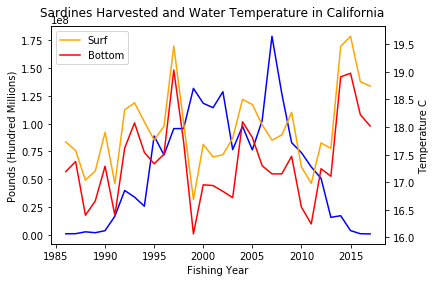

In [93]:
fig, ax1 = plt.subplots()

ca85 = ca[ca.Year > 1985]
x85 = ca85["Year"]
y85 = ca85["Pounds"]
ax1.plot(x85, y85, color = "blue")
ax1.set_ylabel("Pounds (Hundred Millions)")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

tm85 = tm[tm.Year > 1985]
xt85 = tm85["Year"]
ys85 = tm85["Surf"]
ax2.plot(xt85, ys85, "orange")
ax2.set_ylabel("Temperature C")

yb85 = tm85["Bottom"]
plt.plot(xt85, yb85, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Perform Linear Regression on post 1985 data

In [98]:
model = LinearRegression()

x85 = np.array(tm85["Bottom"]).reshape((-1, 1))
y85 = np.array(ca85["Pounds"]).reshape((-1, 1))

model.fit(x85, y85)
r85 = model.score(x85, y85)
print("Rsq = ", r85)

Rsq =  0.04341937515398442


#### Perform Linear Regression on 1952 to 1958 data

In [136]:
x28 = np.array(tm28["Bottom"]).reshape((-1, 1))
y28 = np.array(ca28["Pounds"]).reshape((-1, 1))

model.fit(x28, y28)
r28 = model.score(x28, y28)
print("Rsq = ", r28)

Rsq =  0.38098214873482733


### Monterrey Finshing Data Before 1970

#### Plot Monterrey Data

Text(0.5, 1.0, 'Sardines Harvested in Monterrey')

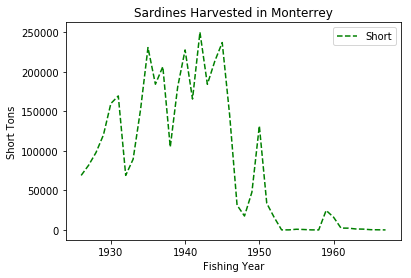

In [126]:
xsh = short["Year"]
ysh = short["Short"]
plt.plot(xsh, ysh, 'g--')
plt.ylabel("Short Tons")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in Monterrey")

#### Group Temperature Data by day, month, and year average. Convert to Data Frame and Reset Index

In [127]:
group = old.groupby(["Year", "Month", "Day"]).mean()
groupo = group.groupby("Year")["Temperature"].mean() 

dfo = groupo.to_frame()
old = dfo.reset_index(level=["Year"])

#### Plot Data

Text(0.5, 1.0, 'Temperature at La Jolla Pier')

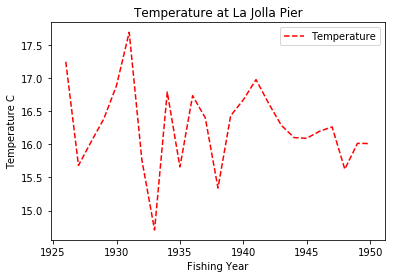

In [128]:
xo = old["Year"]
yo = old["Temperature"]
plt.plot(xo, yo, "r--")
plt.ylabel("Temperature C")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Temperature at La Jolla Pier")

#### Combine with Older Temperature Data between 1925 and 1945

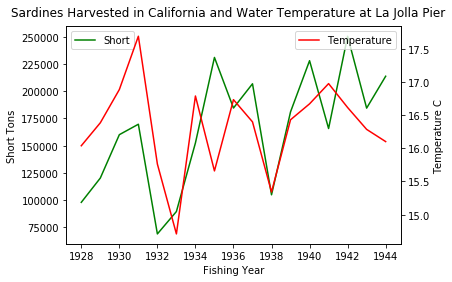

In [129]:
sh45 = short[short.Year < 1945]
ol45 = old[old.Year < 1945]

sh75 = sh45[sh45.Year > 1927]
ol75 = ol45[ol45.Year > 1927]

fig, ax1  = plt.subplots()

xsh = sh75["Year"]
ysh = sh75["Short"]
ax1.plot(xsh, ysh, color = "green")
ax1.set_ylabel("Short Tons")
ax1.set_xlabel("Fishing Year")

ax1.legend()

ax2 = ax1.twinx()

xol = ol75["Year"]
yol = ol75["Temperature"]
ax2.plot(xol, yol, color = "red")
ax2.set_ylabel("Temperature C")

ax2.legend()

fig.suptitle("Sardines Harvested in California and Water Temperature at La Jolla Pier", y = 0.95, fontsize = 12)
fig.savefig("fig/fish_plot_combineold.jpeg")


#### Perform Linear Regression on Old Data

In [158]:
x75 = np.array(ol75["Temperature"]).reshape((-1, 1))
y75 = np.array(sh75["Short"]).reshape((-1, 1))

model.fit(x75, y75)
r75 = model.score(x75, y75)
print("Rsq = ", r75)

Rsq =  0.18215096597624159


## Phase Year Data to Account for Delay of Impact

#### Phase Pre-Collapse Data by 1 Year

In [179]:
phs75 = ol75["Year"] + 1
ol75["Phase"] = phs75

C:\Users\drewc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [180]:
phs85 = tm["Year"] + 10

tm["Phase"] = phs85

tm0 = tm[tm.Phase < 2010]
tm80 = tm0[tm0.Phase > 1985]

ca0 = ca85[ca85.Year < 2010]
ca80 = ca0[ca85.Year > 1985]

C:\Users\drewc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


#### Perform Linear Regression on Phase Data

In [177]:
xp75 = np.array(ol75["Phase"]).reshape((-1, 1))

model.fit(xp75, y75)
r75 = model.score(xp75, y75)
print("Rsq 1927 to 1945 with 1 year lag = ", r75)

model.fit(x28, y28)
r28 = model.score(x28, y28)
print("Rsq 1952 to 1958 with 0 year lag = ", r28)

x80 = np.array(tm80["Phase"]).reshape((-1, 1))
y80 = np.array(ca80["Pounds"]).reshape((-1, 1))

model.fit(x80, y80)
r80 = model.score(x80, y80)
print("Rsq 1985 to 2010 with 10 year lag = ", r80)

Rsq 1927 to 1945 with 1 year lag =  0.3854378502605584
Rsq 1952 to 1958 with 0 year lag =  0.38098214873482733
Rsq 1985 to 2010 with 10 year lag =  0.698954158658849


## Conclusions

#### NOAA Data

Sardines experienced a significant drop before 1950 and was unfished for decades. In the mid 1980s, the fishery was recovered enough but was not as plentiful as before.

#### Temperature Data

When the fishery has been fished, there is a relationship between temperature and harvest. While the entire dataset shows no relationship, the filtered data during the mid 1950s showed a significant positive association between bottom temperature and sardines fished. 

#### Monterrey Historical Data

When the older data is assessed, agressive fishing began in 1926 and ended in 1945. When the temperatures are evaluated, there appears to be some assoication but it is not as strong as the other data subset from the 1950s. 

#### Phased Years

A 1 year delay is strongest in pre collapse data (1927-1945); no delay is strongest in the post collapse data (1952-58); but a 10 year dealy is strongest in contemporary data (1995-2010). It is possible that best practices would include some element of restricted dealy in how much harvest is allowed per year. 

> “Doc would listen to any kind of nonsense and change it for you to a kind of wisdom.”
>
> ― Cannery Row